In [67]:
from pyomo.environ import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [68]:
no_of_nodes = 25

In [69]:
position = {}
position['1'] = (0.472, 0)
position['2'] = (0.292, 0.088)
position['3'] = (0.914, 0.056)
position['4'] = (0.54, 0.1)
position['5'] = (0.39, 0.16)
position['6'] = (0.5, 0.19)
position['7'] = (0.79, 0.16)
position['8'] = (0.35, 0.24)
position['9'] = (0.02, 0.25)
position['10'] = (1, 0.3)
position['11'] = (0.8, 0.33)
position['12'] = (0.44, 0.38)
position['13'] = (0.63, 0.43)
position['14'] = (0.25, 0.49)
position['15'] = (0, 0.51)
position['16'] = (0.77, 0.51)
position['17'] = (0.5, 0.54)
position['18'] = (0.4, 0.6)
position['19'] = (0.66, 0.6)
position['20'] = (0.1, 0.64)
position['21'] = (0.37, 0.72)
position['22'] = (0.02, 0.75)
position['23'] = (0.77, 0.71)
position['24'] = (0.53, 0.8)
position['25'] = (0.54, 1)

In [70]:
# demand = {}
# for i in range(no_of_nodes):
#     demand[i+1] = np.random.randint(1, 500)


demand = {}
demand[1] = 468
demand[2] = 405
demand[3] = 246
demand[4] = 151
demand[5] = 500
demand[6] = 300
demand[7] = 224
demand[8] = 338
demand[9] = 136
demand[10] = 338
demand[11] = 350
demand[12] = 442
demand[13] = 406
demand[14] = 257
demand[15] = 274
demand[16] = 286
demand[17] = 1500
demand[18] = 270
demand[19] = 408
demand[20] = 280
demand[21] = 115
demand[22] = 99
demand[23] = 257
demand[24] = 252
demand[25] = 322
demand

{1: 468,
 2: 405,
 3: 246,
 4: 151,
 5: 500,
 6: 300,
 7: 224,
 8: 338,
 9: 136,
 10: 338,
 11: 350,
 12: 442,
 13: 406,
 14: 257,
 15: 274,
 16: 286,
 17: 1500,
 18: 270,
 19: 408,
 20: 280,
 21: 115,
 22: 99,
 23: 257,
 24: 252,
 25: 322}

In [71]:
cost = {}
# cost = 9999999 * np.ones((no_of_nodes, no_of_nodes))
cost[1, 2] = 0.72
cost[1, 3] = 1
cost[1, 4] = 0.6
cost[2, 4] = 0.8
cost[2, 5] = 0.5
cost[2, 9] = 1.5
cost[3, 4] = 2
cost[3, 7] = 0.65
cost[4, 7] = 1.35
cost[4, 6] = 0.5
cost[4, 5] = 0.5
cost[5, 6] = 0.4
cost[5, 9] = 1.1
cost[5, 8] = 0.7
cost[6, 7] = 0.9
cost[6, 8] = 0.4
cost[7, 10] = 1.5
cost[7, 11] = 1.1
cost[8, 9] = 0.8
cost[8, 12] = 1.1
cost[9, 12] = 1.4
cost[10, 11] = 1.1
cost[11, 13] = 0.7
cost[11, 12] = 1.7
cost[12, 13] = 2.4
# cost[12, 14] = 1.2
cost[12, 17] = 2.4
cost[13, 16] = 1
cost[13, 17] = 3.4
cost[14, 15] = 0.6
cost[14, 18] = 0.9
cost[15, 18] = 1.5
cost[15, 20] = 0.9
cost[16, 17] = 3
cost[17,18] = 1.5
cost[17, 19] = 2.5
cost[18, 20] = 0.8
cost[18, 19] = 2
cost[18, 23] = 1.3
cost[18, 21] = 0.7
cost[19, 23] = 0.72
cost[20, 21] = 0.9
cost[21, 22] = 0.8
cost[21, 24] = 0.75
cost[21, 23] = 1
cost[22, 24] = 1.3
cost[22, 25] = 2.2
cost[23, 24] = 1
cost[24, 25] = 1.1


cost_set = {}
actual_cost = {}


In [72]:
for i in range(no_of_nodes):
    for j in range(no_of_nodes):
        if (i+1, j+1) in cost:
            cost_set[i+1, j+1] = cost[i+1, j+1]
            actual_cost[i+1, j+1] = cost[i+1, j+1]
        else:
            cost_set[i+1, j+1] = 9999999
            actual_cost[i+1, j+1] = 0

print(cost_set)
print(actual_cost)

{(1, 1): 9999999, (1, 2): 0.72, (1, 3): 1, (1, 4): 0.6, (1, 5): 9999999, (1, 6): 9999999, (1, 7): 9999999, (1, 8): 9999999, (1, 9): 9999999, (1, 10): 9999999, (1, 11): 9999999, (1, 12): 9999999, (1, 13): 9999999, (1, 14): 9999999, (1, 15): 9999999, (1, 16): 9999999, (1, 17): 9999999, (1, 18): 9999999, (1, 19): 9999999, (1, 20): 9999999, (1, 21): 9999999, (1, 22): 9999999, (1, 23): 9999999, (1, 24): 9999999, (1, 25): 9999999, (2, 1): 9999999, (2, 2): 9999999, (2, 3): 9999999, (2, 4): 0.8, (2, 5): 0.5, (2, 6): 9999999, (2, 7): 9999999, (2, 8): 9999999, (2, 9): 1.5, (2, 10): 9999999, (2, 11): 9999999, (2, 12): 9999999, (2, 13): 9999999, (2, 14): 9999999, (2, 15): 9999999, (2, 16): 9999999, (2, 17): 9999999, (2, 18): 9999999, (2, 19): 9999999, (2, 20): 9999999, (2, 21): 9999999, (2, 22): 9999999, (2, 23): 9999999, (2, 24): 9999999, (2, 25): 9999999, (3, 1): 9999999, (3, 2): 9999999, (3, 3): 9999999, (3, 4): 2, (3, 5): 9999999, (3, 6): 9999999, (3, 7): 0.65, (3, 8): 9999999, (3, 9): 9999999

In [73]:
edges = []
for i in range(no_of_nodes):
    for j in range(no_of_nodes):
        # if transmission_constraints[i][j] != 0:
        edges.append((i+1, j+1))

print(edges)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (4, 24), (4, 25), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), 

In [74]:
# Placeholder for initializing travel costs between nodes
# This should be replaced with actual data or a method for calculating travel costs
travel_cost_set = {(i, j): 1 for i in range(1, no_of_nodes + 1) for j in range(1, no_of_nodes + 1) if i != j}


In [75]:

def NodesOut_init(m, node):
    for i, j in m.Arcs:
        if i == node:
            yield j

def NodesIn_init(m, node):
    for i, j in m.Arcs:
        if j == node:
            yield i

model = AbstractModel()
model.Nodes = Set(initialize = [i+1 for i in range(no_of_nodes)])
model.Arcs = Set(dimen=2, initialize = edges)

model.NodesIn = Set(model.Nodes, initialize=NodesIn_init)
model.NodesOut = Set(model.Nodes, initialize=NodesOut_init)

model.demand = Param(model.Nodes, initialize = demand)
model.cost = Param(model.Arcs, initialize = cost_set)
model.TravelCost = Param(model.Nodes, model.Nodes, initialize=travel_cost_set, default=0)


model.UserToNode = Var(model.Nodes, model.Nodes, domain=Binary)
model.Route = Var(model.Arcs, domain=Binary)
model.S = Var(model.Nodes, domain=Binary)

def obj_expression(m):
    return sum(m.demand[i] * m.S[i] for i in m.Nodes) - \
           sum(m.cost[i, j] * m.Route[i, j] for i, j in m.Arcs) - \
           sum(m.TravelCost[i, j] * m.UserToNode[i, j] for i in m.Nodes for j in m.Nodes if i != j)

model.obj = Objective(rule=obj_expression, sense=maximize)

def UserAllocationToOptimalNodesOnly(m, i):
    return sum(m.UserToNode[i, j] for j in m.Nodes) <= m.S[i]

model.UserAllocationConstraint = Constraint(model.Nodes, rule=UserAllocationToOptimalNodesOnly)

def OneAllocationPerUser(m, i):
    # Ensure this constraint applies only to nodes not on the optimal path initially
    if not m.S[i].value:  # This line presumes pre-calculation or a separate method to determine if S[i] is part of the optimal path initially
        return sum(m.UserToNode[i, j] for j in m.Nodes) == 1
    else:
        return Constraint.Skip
model.OneAllocationPerUserConstraint = Constraint(model.Nodes, rule=OneAllocationPerUser)


def PathConstraint(m):
    for i in m.Nodes:
        if i == 1:
            return m.S[i] == 1
        else:
            return m.S[i] <= sum(m.Route[i,j] for j in m.NodesIn[i])

def StartConstraint(m):
    return m.S[1] == 1

def EndConstraint(m):
    return m.S[25] == 1

def StartPathConstraint(m):
    return sum(m.Route[1,j] for j in m.NodesOut[1]) == 1
def StartPathConstraint1(m):
    return sum(m.Route[i,1] for i in m.NodesIn[1]) == 0
def EndPathConstraint1(m):
    return sum(m.Route[25,j] for i in m.NodesOut[25]) == 0
def EndPathConstraint(m):
    return sum(m.Route[i,25] for i in m.NodesIn[25]) == 1

def ContinuityConstraint(m, i):
    if i != 1 and i != 25:
        return sum(m.Route[j,i] for j in m.NodesIn[i]) == sum(m.Route[i,j] for j in m.NodesOut[i])
    else:
        return Constraint.Skip


model.StartPathConstraint = Constraint(rule=StartPathConstraint)
model.EndPathConstraint = Constraint(rule=EndPathConstraint)
model.StartConstraint = Constraint(rule=StartConstraint)
model.EndConstraint = Constraint(rule=EndConstraint)
model.PathConstraint = Constraint(rule=PathConstraint)
model.ContinuityConstraint = Constraint(model.Nodes, rule=ContinuityConstraint)

In [76]:
instance = model.create_instance()
opt = SolverFactory('glpk')
opt.solve(instance) 

{'Problem': [{'Name': 'unknown', 'Lower bound': 8614.95, 'Upper bound': 8614.95, 'Number of objectives': 1, 'Number of constraints': 78, 'Number of variables': 1275, 'Number of nonzeros': 2432, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '1', 'Number of created subproblems': '1'}}, 'Error rc': 0, 'Time': 0.0565495491027832}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [77]:
optimized_flow_values = {}
ones = {}
zeros = []
for i in instance.Arcs:
    optimized_flow_values[i] = instance.Route[i].value
    if instance.Route[i].value != None and instance.Route[i].value != 0: ones[i] = instance.Route[i].value
    else: zeros.append(i)

# Print or use the optimized x values
print(optimized_flow_values)
print(ones)

{(1, 1): 0.0, (1, 2): 0.0, (1, 3): 0.0, (1, 4): 1.0, (1, 5): 0.0, (1, 6): 0.0, (1, 7): 0.0, (1, 8): 0.0, (1, 9): 0.0, (1, 10): 0.0, (1, 11): 0.0, (1, 12): 0.0, (1, 13): 0.0, (1, 14): 0.0, (1, 15): 0.0, (1, 16): 0.0, (1, 17): 0.0, (1, 18): 0.0, (1, 19): 0.0, (1, 20): 0.0, (1, 21): 0.0, (1, 22): 0.0, (1, 23): 0.0, (1, 24): 0.0, (1, 25): 0.0, (2, 1): 0.0, (2, 2): 0.0, (2, 3): 0.0, (2, 4): 0.0, (2, 5): 0.0, (2, 6): 0.0, (2, 7): 0.0, (2, 8): 0.0, (2, 9): 0.0, (2, 10): 0.0, (2, 11): 0.0, (2, 12): 0.0, (2, 13): 0.0, (2, 14): 0.0, (2, 15): 0.0, (2, 16): 0.0, (2, 17): 0.0, (2, 18): 0.0, (2, 19): 0.0, (2, 20): 0.0, (2, 21): 0.0, (2, 22): 0.0, (2, 23): 0.0, (2, 24): 0.0, (2, 25): 0.0, (3, 1): 0.0, (3, 2): 0.0, (3, 3): 0.0, (3, 4): 0.0, (3, 5): 0.0, (3, 6): 0.0, (3, 7): 0.0, (3, 8): 0.0, (3, 9): 0.0, (3, 10): 0.0, (3, 11): 0.0, (3, 12): 0.0, (3, 13): 0.0, (3, 14): 0.0, (3, 15): 0.0, (3, 16): 0.0, (3, 17): 0.0, (3, 18): 0.0, (3, 19): 0.0, (3, 20): 0.0, (3, 21): 0.0, (3, 22): 0.0, (3, 23): 0.0, (3, 

In [78]:
def path_diagram(flowDict):

    G = nx.DiGraph()
    for i in range(no_of_nodes):
        G.add_node(str(i+1))

    # for i in range(no_of_districs):
    #     for j in range(no_of_districs):
    #         if transmission_constraints[i][j] != 0:
    #             G.add_edge(str(i), str(j), capacity=transmission_constraints[i][j], weight=2)

    for (i, j) in flowDict:
        G.add_edge(str(i), str(j))

    labels = {}
    pos = nx.random_layout(G)
    for i in flowDict:
        labels[(str(i[0]), str(i[1]))] = flowDict[i]
        # print(flowDict[i])

    print(labels)

    plt.figure()
    nx.draw(
        G, position, edge_color='black', width=1, linewidths=1,
        node_size=500, node_color='pink', alpha=0.9,
        labels={node: node for node in G.nodes()}
    )

    # nx.draw_networkx_edge_labels(G, position=position, edge_labels=labels, font_color='red')

{('1', '4'): 1.0, ('4', '6'): 1.0, ('6', '8'): 1.0, ('8', '12'): 1.0, ('12', '17'): 1.0, ('17', '18'): 1.0, ('18', '21'): 1.0, ('21', '24'): 1.0, ('24', '25'): 1.0}


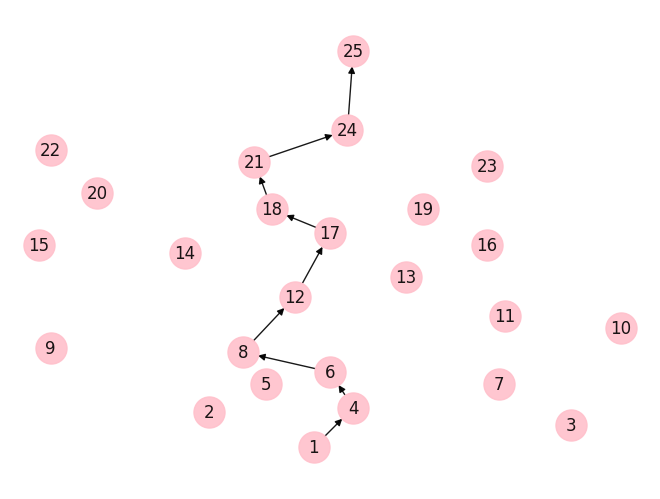

In [79]:
path_diagram(ones)